In [1]:
import os
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
from imgaug import augmenters as iaa

!git clone https://github.com/fernandogabrieu/Projeto-PDI.git

Cloning into 'Projeto-PDI'...
remote: Enumerating objects: 307, done.
remote: Counting objects: 100% (93/93), done.
remote: Compressing objects: 100% (92/92), done.
remote: Total 307 (delta 5), reused 87 (delta 1), pack-reused 214
Receiving objects: 100% (307/307), 70.25 MiB | 16.44 MiB/s, done.
Resolving deltas: 100% (9/9), done.
Updating files: 100% (302/302), done.


#Aplicação de filtros nas imagens

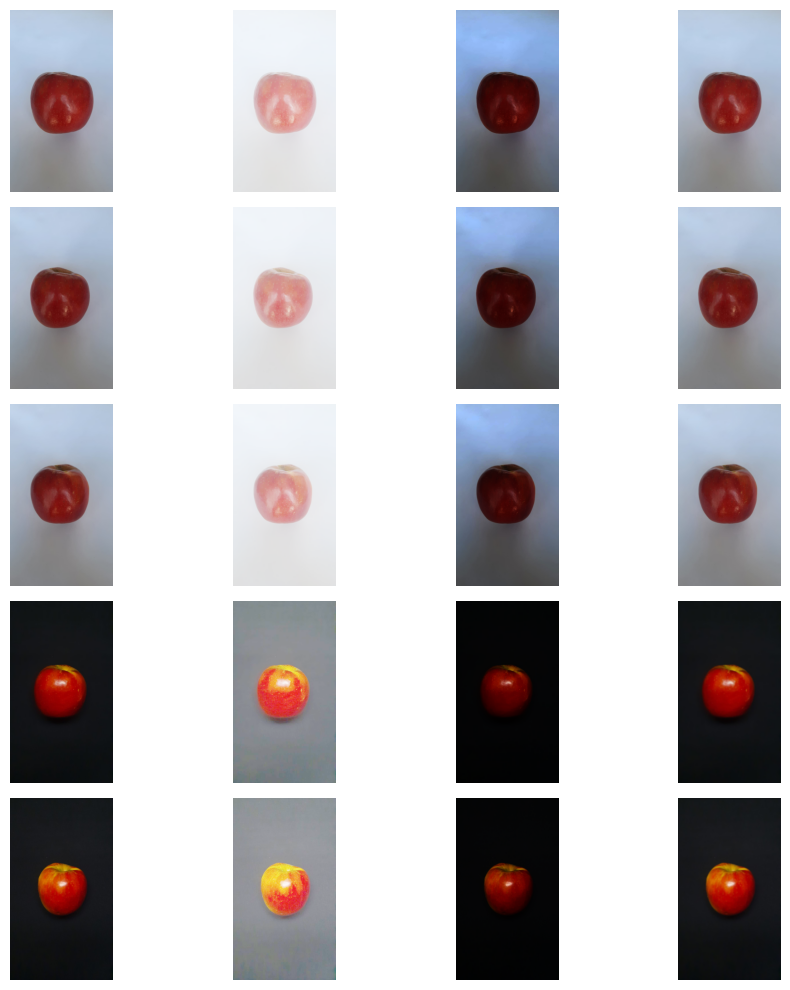

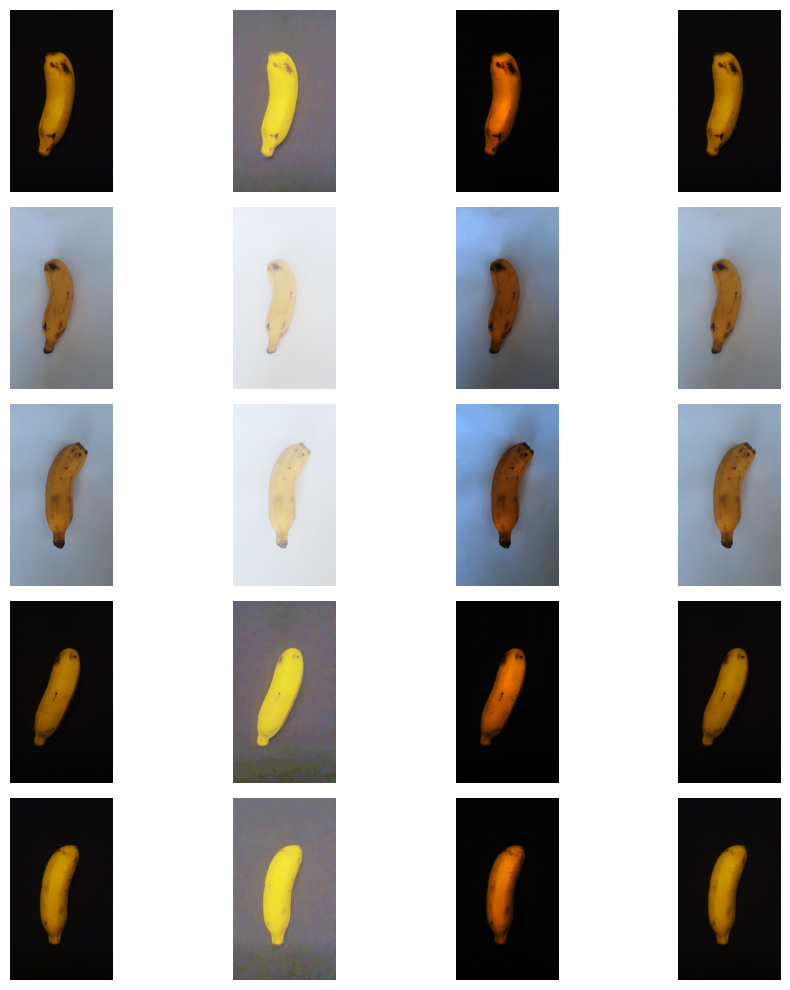

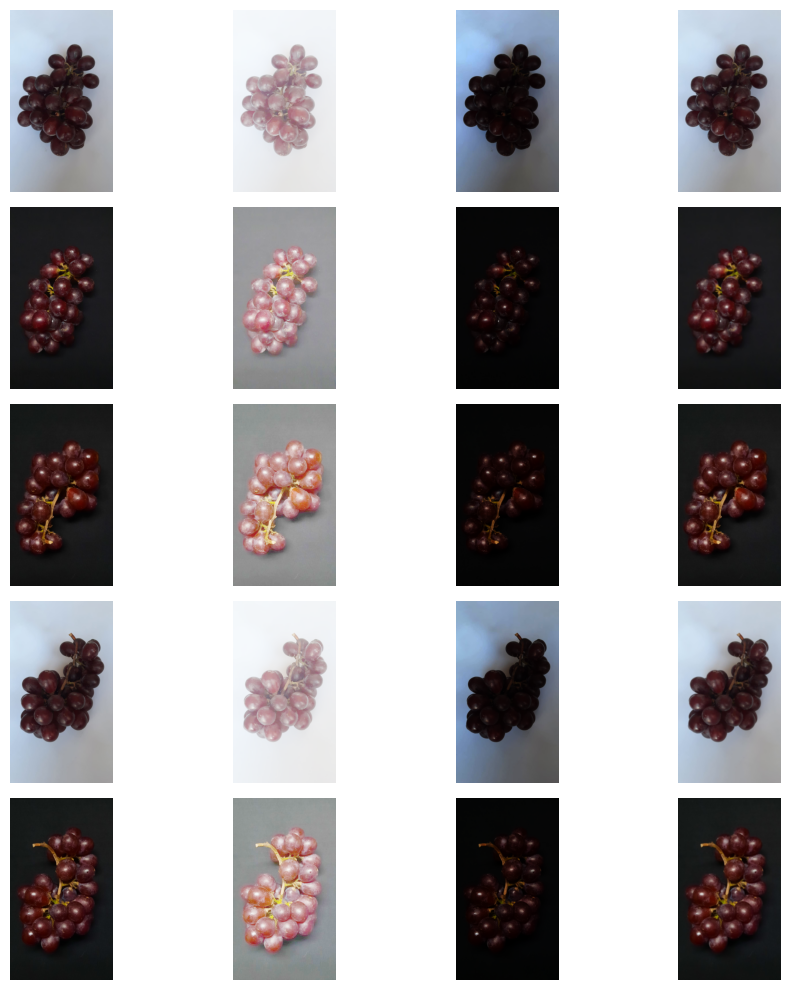

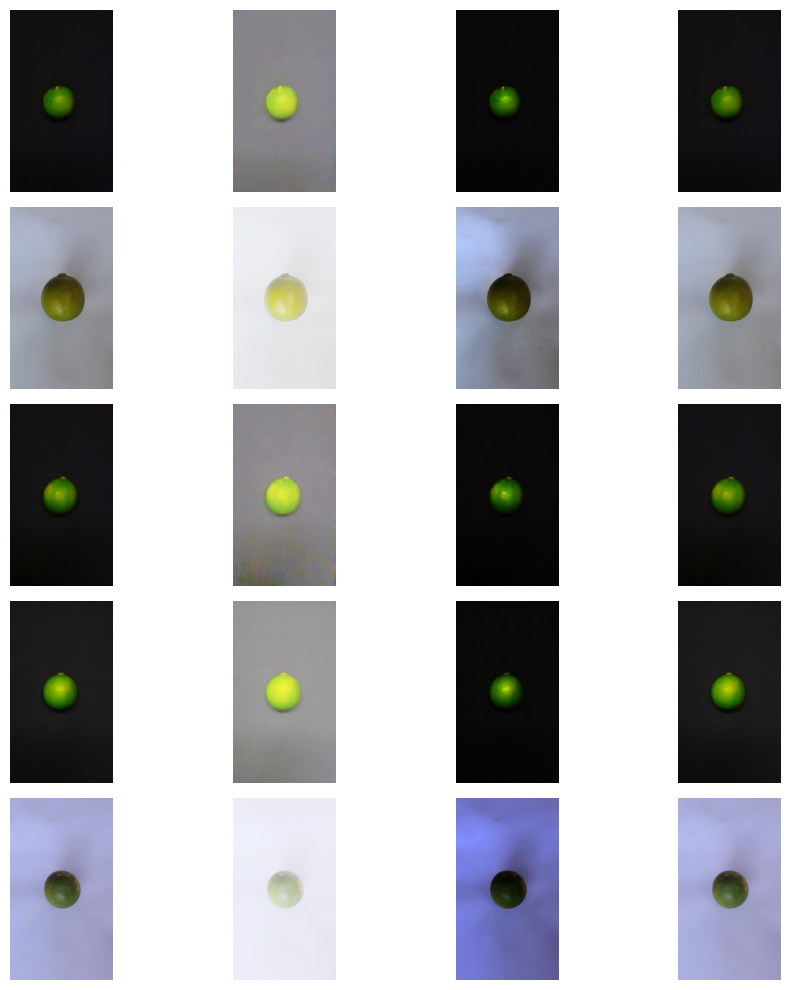

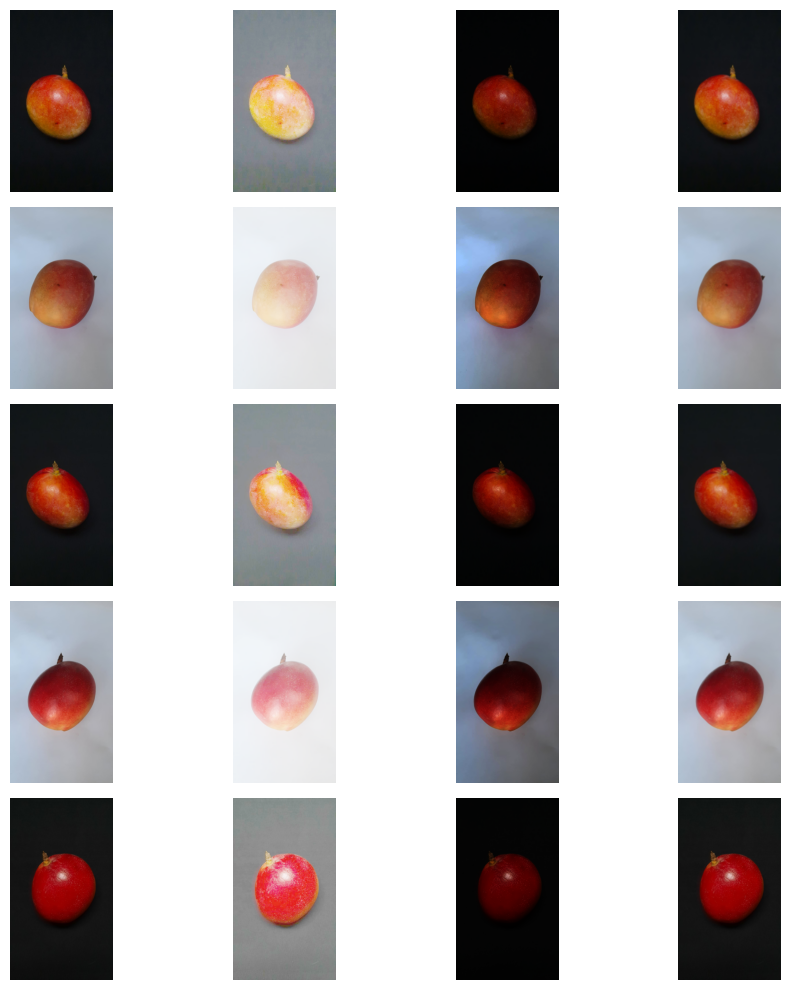

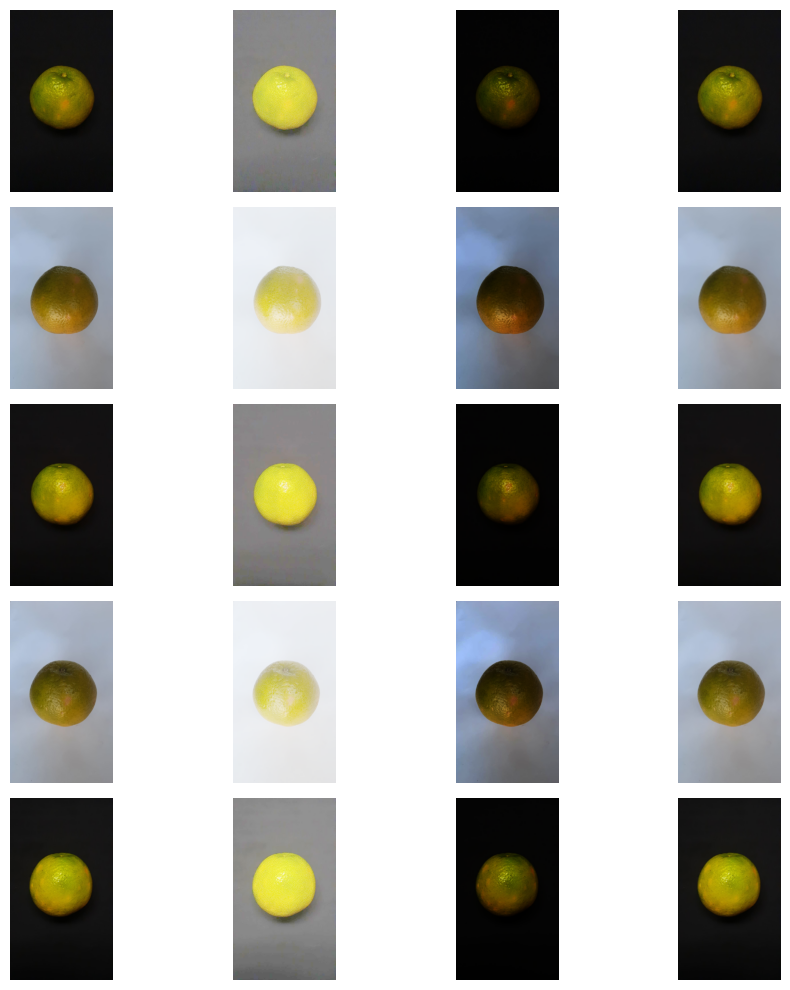

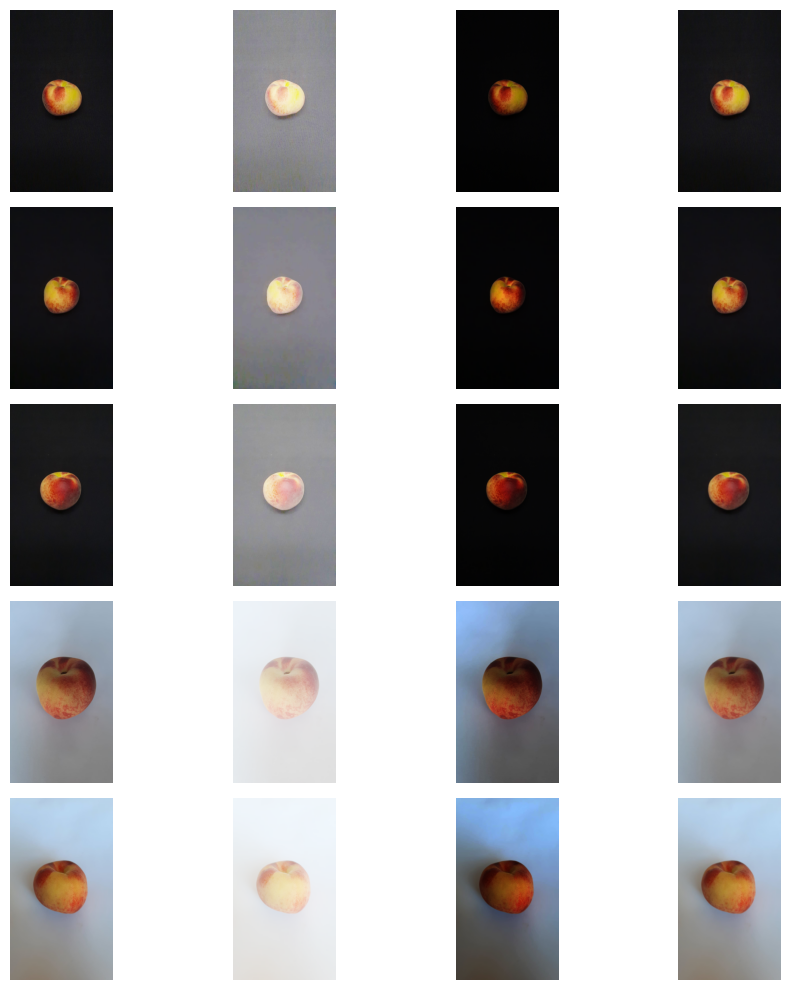

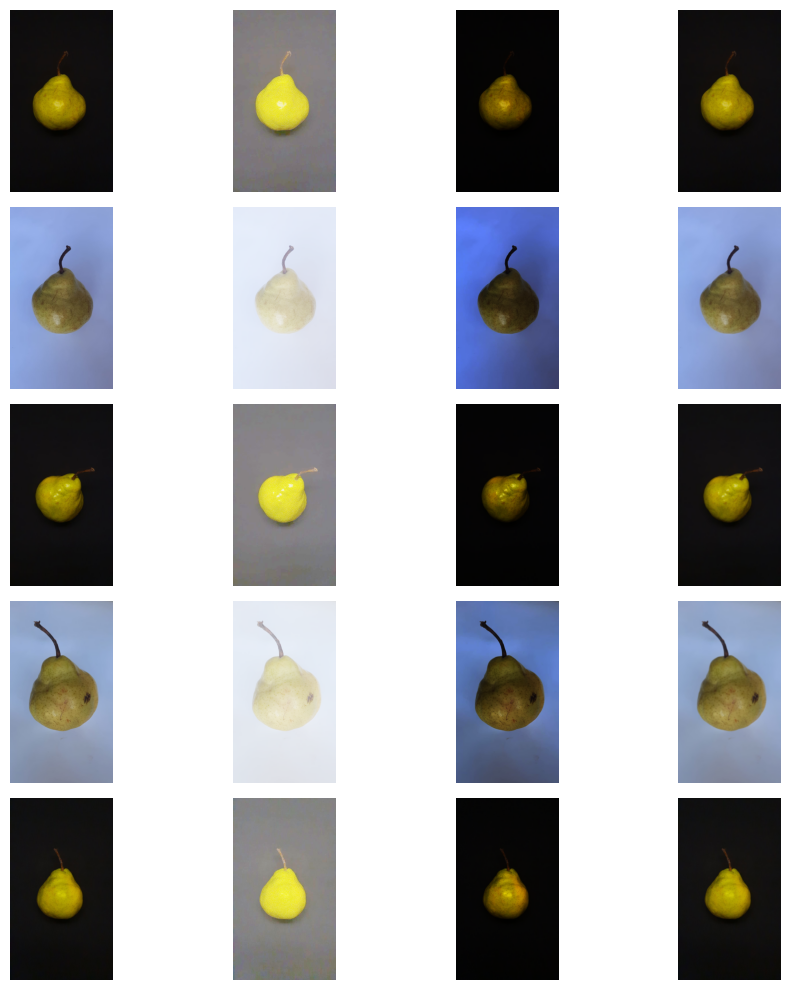

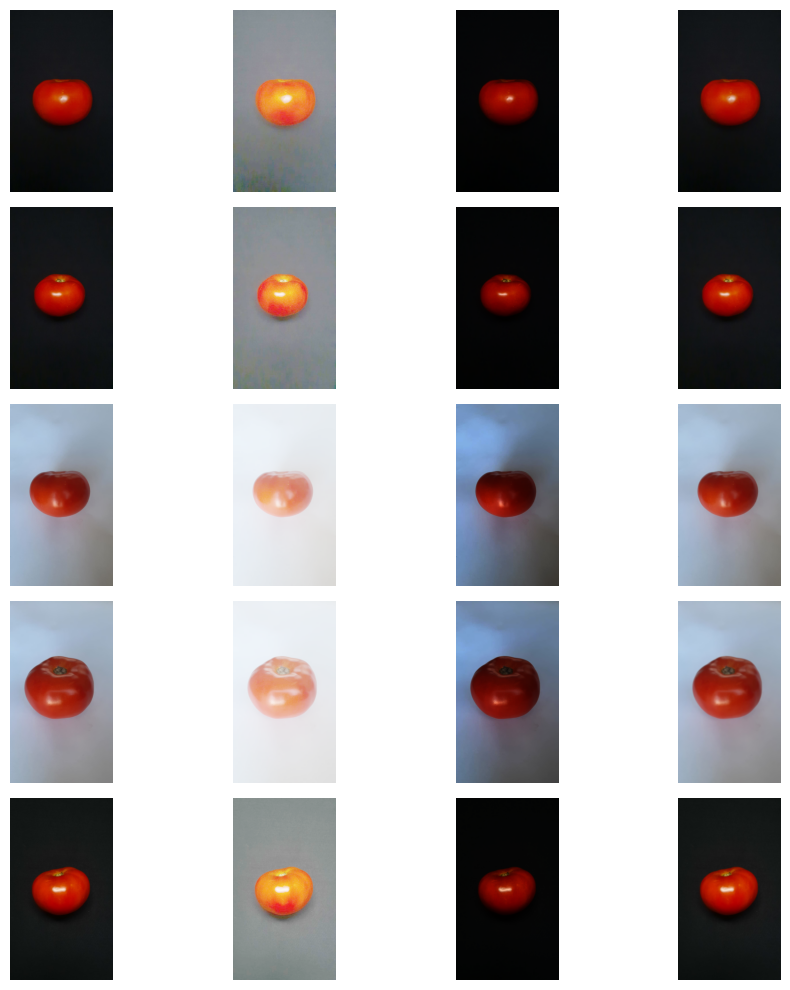

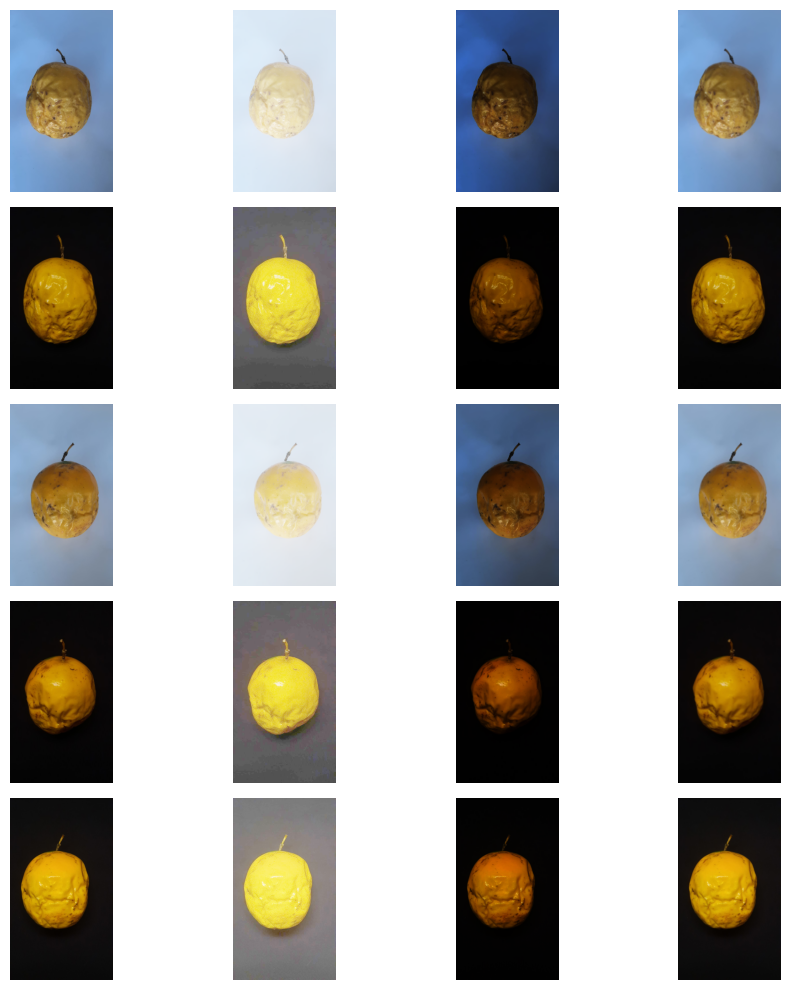

In [2]:
# Funções para aplicar os filtros nas imagens

#Flip

def horizontal_flip(image):
    hflip= iaa.Fliplr(p=1.0)
    hflipped_image = hflip.augment_image(image)
    return hflipped_image

def vertical_flip(image):
    vflip= iaa.Flipud(p=1.0)
    vflipped_image = vflip.augment_image(image)
    return vflipped_image

#Brightness and Contrast

def bright_image(image):
    contrast1 = iaa.GammaContrast(gamma = 0.5)
    brightened_image = contrast1.augment_image(image)
    return brightened_image

def dark_image(image):
    contrast2 = iaa.GammaContrast(gamma=2)
    darkened_image = contrast2.augment_image(image)
    return darkened_image

#Filtro de escala logarítmica de contraste
def log_filter(image):
    c = 255 / np.log1p(256)  # Normalização
    log_image = c * np.log1p(1 + image.astype(np.float32)) #Escala logarítmica de contraste: s = c log(1+p)
    return log_image.astype(np.uint8)

#Filtro de escala exponencial de contraste
def exp_filter(image):
    # Converte a imagem para ponto flutuante para aplicar o filtro
    img_float = image.astype(float)

    # Aplica o filtro exponencial em cada canal de cor
    alpha = 0.01  # Fator exponencial
    for i in range(3):  # Loop para cada canal de cor (R, G, B)
        img_float[:, :, i] = np.exp(alpha * img_float[:, :, i])

    # Normaliza a imagem resultante de 0 a 255 (8 bits)
    filtered_img = cv2.normalize(img_float, None, 0, 255, cv2.NORM_MINMAX)
    filtered_img = np.uint8(filtered_img)
    return filtered_img

#Filtro da média por convolução (utilizei o GaussianBlur())
def mean_filter(image):
    filter = iaa.GaussianBlur(sigma=(0, 3.0))
    image_filtered = filter.augment_image(image)
    return image_filtered

# Função que carrega e processa as novas imagens
def process_images_in_folder(folder_path):
    augmented_images = []
    for file_path in glob.glob(os.path.join(folder_path, '*.png')):
        img = cv2.imread(file_path)
        if img is not None:

            log_filtered = log_filter(img)
            exp_filtered = exp_filter(img)
            mean_filtered = mean_filter(img)
            #horizontal_flipped = horizontal_flip(img)
            #vertical_flipped = vertical_flip(img)
            #brightened_image = bright_image(img)
            #darkened_image = dark_image(img)
            augmented_images.extend([img, log_filtered, exp_filtered, mean_filtered])#, horizontal_flipped, vertical_flipped, brightened_image, darkened_image])


            # Obtendo o nome do arquivo sem a extensão
            filename = os.path.splitext(os.path.basename(file_path))[0]

            # Salvando as imagens com os filtros aplicados na pasta correspondente
            cv2.imwrite(os.path.join(folder_path, f'{filename}_log_filtered.png'), log_filtered)
            cv2.imwrite(os.path.join(folder_path, f'{filename}_exp_filtered.png'), exp_filtered)
            cv2.imwrite(os.path.join(folder_path, f'{filename}_mean_filtered.png'), mean_filtered)
    return augmented_images

# Definindo os caminhos das pastas
folder_apple = "/content/Projeto-PDI/fruits-images/APPLE"
folder_banana = "/content/Projeto-PDI/fruits-images/BANANA"
folder_grape = "/content/Projeto-PDI/fruits-images/GRAPE"
folder_lemon = "/content/Projeto-PDI/fruits-images/LEMON"
folder_mango = "/content/Projeto-PDI/fruits-images/MANGO"
folder_orange = "/content/Projeto-PDI/fruits-images/ORANGE"
folder_peach = "/content/Projeto-PDI/fruits-images/PEACH"
folder_pear = "/content/Projeto-PDI/fruits-images/PEAR"
folder_tomato = "/content/Projeto-PDI/fruits-images/TOMATO"
folder_yellow_passion_fruit = "/content/Projeto-PDI/fruits-images/YELLOW_PASSION_FRUIT"

folders = [
    folder_apple,
    folder_banana,
    folder_grape,
    folder_lemon,
    folder_mango,
    folder_orange,
    folder_peach,
    folder_pear,
    folder_tomato,
    folder_yellow_passion_fruit
]

# Função principal para Filtragem, salvamento e exibição das versões aumentadas
for folder in folders:
    augmented_images = process_images_in_folder(folder)
    fig, axes = plt.subplots(nrows=len(augmented_images)//4, ncols=4, figsize=(10, 10))

    for i, image in enumerate(augmented_images):
        ax = axes[i // 4, i % 4]
        ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        ax.axis('off')

    plt.tight_layout()
    plt.show()


#Download das imagens geradas

In [3]:
from google.colab import files
!zip -r /content/Projeto-PDI/fruits-images.zip /content/Projeto-PDI/fruits-images/
files.download("/content/Projeto-PDI/fruits-images.zip")

  adding: content/Projeto-PDI/fruits-images/ (stored 0%)
  adding: content/Projeto-PDI/fruits-images/BANANA/ (stored 0%)
  adding: content/Projeto-PDI/fruits-images/BANANA/1-01-V1-B_exp_filtered.png (deflated 16%)
  adding: content/Projeto-PDI/fruits-images/BANANA/1-02-V1-B_exp_filtered.png (deflated 16%)
  adding: content/Projeto-PDI/fruits-images/BANANA/1-01-V1-B_log_filtered.png (deflated 20%)
  adding: content/Projeto-PDI/fruits-images/BANANA/1-01-V1-B_mean_filtered.png (deflated 15%)
  adding: content/Projeto-PDI/fruits-images/BANANA/1-01-V2-B.png (deflated 3%)
  adding: content/Projeto-PDI/fruits-images/BANANA/1-01-V2-W.png (deflated 3%)
  adding: content/Projeto-PDI/fruits-images/BANANA/1-01-V2-B_exp_filtered.png (deflated 35%)
  adding: content/Projeto-PDI/fruits-images/BANANA/1-01-V1-W_log_filtered.png (deflated 15%)
  adding: content/Projeto-PDI/fruits-images/BANANA/1-01-V2-W_exp_filtered.png (deflated 20%)
  adding: content/Projeto-PDI/fruits-images/BANANA/1-01-V2-B_mean_fil

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>